In [68]:
import nltk
import glob
import re

#### Preparing Data

In [138]:
def add_start_stop_token(s):
    # adds start and stop tokens to a string at the beginning and end of sentences
    sentences = re.split("\.|\;|\!|\?|\:", s)
    output = [ "SENTENCE_START " + s + " SENTENCE_END" for s in sentences]
    return ' '.join(output)
    """
    Input:
        string s
    Output:
        string
    """

def tokenize(s):
    # turns string into list of strings separated by spaces
    return s.split()
    """
    Input:
        string s
    Output:
        list of strings
    """
    
def preprocess(s, lowercase=True, strip_punctuation=True):
    """
    Input:
        string s
        boolean lowercase
        boolean strip_punctuation
    Output:
        list of strings
    """
    punctuation='.,?<>:;"\'!%'
    if isinstance(s, str):
        # if s is an instance of the string class
        s = tokenize(s)
    if lowercase:
        # if the lowercase option is true, go through each element in the list and turn the characters lowercase
        s = [t.lower() for t in s]
    if strip_punctuation:
        # get rid of the punction for each of the elements in the list
        # need to do this after splitting each word up because strip only looks at the beginning and end of a string
        s = [t.strip(punctuation) for t in s]
    return s
    
def token_frequency(tokens, tf=None, relative=False):
    # We want to have raw frequency as default because if we want to look at multiple texts, then we can add the raw frequencies together
    """
    Input: 
        tokens = list of strings or None
        tf = dict or None
        realtive = boolean
    Return:
        dictionary of tokens and frequency {t:f}
    """
    token_frequency = {} # dictionary to hold token counts
    
    # adding previous token frequency dictionary
    token_frequency={} if tf==None else tf
    if len(token_frequency) != 0 and relative==True:
        if isinstance(list(token_frequency.items())[0][1], float):
            print('warning, adding raw counts to relative frequency')
            return tf
    
    # counting up the words
    for token in tokens:
        if token in token_frequency:
            # if the token is already a key in the dictionary
            token_frequency[token] += 1
        else:
            # token is not a key in the dictionary
            token_frequency[token] = 1
    
    # changing to relative or keeping as raw frequency
    if relative:
        # relative frequency is wanted
        total_words = sum([v for k, v in token_frequency.items()]) # total number of words in the string that was input and the new tf dictionary
        return {k:v/total_words for k,v in token_frequency.items()} # go through each key, value pair in the dictionary and divide the value by the total number of words 
        # note: dictionary.items() turns the dictionary into a list of tuples ie. [(key1, value1), (key2, value2)]
    else:
        # want raw frequency
        return token_frequency

In [144]:
files = glob.glob("./shakespeare/*.txt")

# total token frequency
total_frequency = {}

for file in files:
    # tokenize text
    text = open(file, "r").read()
    text = add_start_stop_token(text)
    tokens = preprocess(text)
    total_frequency = token_frequency(tokens, tf=total_frequency) # update running total token frequency
    
# sort total_frequency
total_frequency = {k:v for k,v in sorted(total_frequency.items(), key=lambda item: -item[1])}
print(total_frequency)

{'sentence_start': 82106, 'sentence_end': 82106, 'the': 26282, 'and': 23585, 'i': 20133, 'to': 18003, 'of': 15681, 'you': 13452, 'a': 13450, 'my': 12031, 'that': 10483, 'in': 10299, 'is': 8942, 'not': 8284, 'me': 7560, 'it': 7516, 'for': 7337, 'with': 7011, 'be': 6698, 'your': 6548, 'this': 6444, 'his': 6409, 'he': 6141, 'but': 5971, 'have': 5788, 'as': 5499, 'thou': 5252, 'him': 5007, 'will': 4882, 'so': 4874, 'what': 4374, 'thy': 3745, 'no': 3703, 'do': 3655, 'her': 3636, 'by': 3567, 'all': 3532, 'shall': 3521, 'if': 3422, 'are': 3325, 'we': 3284, 'thee': 3038, 'our': 3034, 'on': 2861, 'good': 2803, 'now': 2737, 'lord': 2623, 'o': 2505, 'from': 2487, 'come': 2482, 'sir': 2446, 'at': 2362, 'or': 2293, 'they': 2268, 'would': 2262, 'more': 2236, 'was': 2178, 'which': 2174, 'well': 2129, 'she': 2129, 'am': 2122, 'how': 2113, 'then': 2090, 'let': 2070, 'here': 2070, 'their': 1929, 'when': 1928, 'them': 1881, 'hath': 1873, 'love': 1867, 'than': 1829, 'there': 1778, 'man': 1774, "i'll": 172

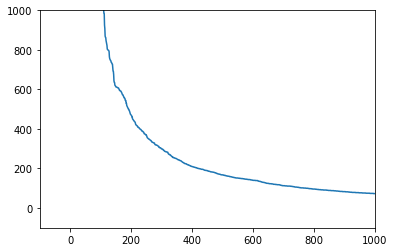

In [146]:
import matplotlib.pyplot as plt
words = [k for k,v in total_frequency.items()]
freqs = [v for k,v in total_frequency.items()]
plt.axis([-100,1000,-100,1000])
plt.plot(freqs)
# can see that slope=-1 at around 300 words

In [147]:
word_thresh = 300
infreq_words = [k for k,v in total_frequency.items() if v<word_thresh] # list of words below the threshold

In [154]:
print(len(total_frequency))
len(infreq_words)

28667


28367

#### Building Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop

